In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Iris.csv")

In [3]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df['Species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: Species, dtype: int64

In [7]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df = df.drop(['Species'], axis = 1)

In [10]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
X = StandardScaler()

In [13]:
scaled_df = X.fit_transform(df)

In [14]:
scaled_df

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [15]:
from sklearn.cluster import KMeans

In [16]:
kmeans = KMeans(n_clusters = 3, random_state = 123)
kmeans.fit(df)
label = kmeans.labels_
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [17]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(scaled_df, label)
sil_score

0.44240103164555117

In [18]:
label_0 = df[label == 0]
label_1 = df[label == 1]
label_2 = df[label == 2]

In [19]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [20]:
import matplotlib.pyplot as plt

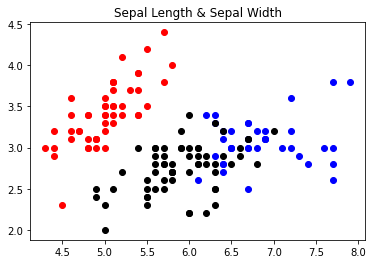

In [21]:
plt.scatter(label_0.iloc[:,0:1], label_0.iloc[:,1:2], color = 'red')
plt.scatter(label_1.iloc[:,0:1], label_1.iloc[:,1:2], color = 'blue')
plt.scatter(label_2.iloc[:,0:1], label_2.iloc[:,1:2], color = 'black')

plt.title("Sepal Length & Sepal Width")
plt.show();

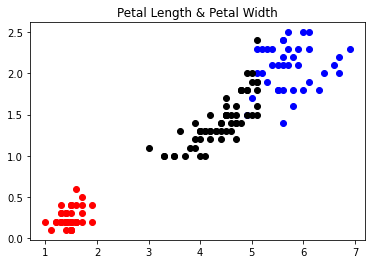

In [22]:
plt.scatter(label_0.iloc[:,2:3], label_0.iloc[:,3:4], color = 'red')
plt.scatter(label_1.iloc[:,2:3], label_1.iloc[:,3:4], color = 'blue')
plt.scatter(label_2.iloc[:,2:3], label_2.iloc[:,3:4], color = 'black')

plt.title("Petal Length & Petal Width")
plt.show();

### Cluster Profiling

In [23]:
df['Cluster_kmeans3'] = label

In [24]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster_kmeans3
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster_kmeans3
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1
149,5.9,3.0,5.1,1.8,2


In [26]:
df['Cluster_kmeans3'].value_counts()

2    62
0    50
1    38
Name: Cluster_kmeans3, dtype: int64

In [27]:
clust_profile = df
clust_profile = clust_profile.groupby('Cluster_kmeans3').mean()
clust_profile['freq'] = df['Cluster_kmeans3'].value_counts().sort_index()
clust_profile

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,freq
Cluster_kmeans3,,,,,
0,5.006000,3.418000,1.464000,0.244000,50
1,6.850000,3.073684,5.742105,2.071053,38
2,5.901613,2.748387,4.393548,1.433871,62
